In [1]:
import requests
import os
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
con = sqlite3.connect("data/emissions.sqlite")
con2 = sqlite3.connect("data/generate_waste.sqlite")
con3 = sqlite3.connect("data/treat_waste.sqlite")

df_emissions = pd.read_sql_query("SELECT * from emissions", con)
con.close()

df_generate_waste = pd.read_sql_query("SELECT * from generate_waste", con2)
con2.close()

df_treat_waste = pd.read_sql_query("SELECT * from treat_waste", con3)
con3.close()

## Database visualisation

### Emissions table

In [3]:
df_emissions = df_emissions.drop(['index','Name'], axis=1)
df_emissions.head(5)

,Emission Sector,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018
0,Emissions from biomass burning,0.454820,0.354977,0.353629,0.350116,0.401103,0.376501,0.372729,0.427636,0.386539,0.492477,0.504074,0.513859,0.445393,0.455365,0.366924
1,Incineration and Open Burning of Waste,0.000893,0.000568,0.000585,0.000023,0.000022,0.000023,0.000043,0.000147,0.000036,0.000025,0.000013,0.000014,0.000015,0.000016,0.000017
2,Main Activity Electricity and Heat Production,0.581944,0.603752,0.646378,0.670161,0.702585,0.669695,0.682530,0.597664,0.616068,0.565305,0.559873,0.570135,0.613571,0.609766,0.586702
3,Petroleum Refining - Manufacture of Solid Fuel...,0.100303,0.105945,0.104584,0.098223,0.099935,0.087664,0.100346,0.062978,0.068637,0.069599,0.068002,0.095377,0.085655,0.093195,0.095093
4,Manufacturing Industries and Construction,1.838147,1.874918,1.884185,1.821839,1.746298,1.346745,1.362954,1.435442,1.509525,1.483011,1.629930,1.720960,1.755933,1.864889,1.851044


In [4]:
# To check all columns are numeric

sliced_df = df_emissions.iloc[1:, 2:]
# Convert to numeric and keep track of non-numeric columns
numeric_df = sliced_df.apply(pd.to_numeric, errors='coerce')

# Identify columns with any NaN values
non_numeric_columns = numeric_df.columns[numeric_df.isnull().any()].tolist()
if non_numeric_columns:
    print("Columns with non-numeric data:", non_numeric_columns)
else:
    print("All columns have numeric data.")

All columns have numeric data.


In [5]:
#Before removing the null 
nn = df_emissions.isnull().sum()

#After Removing the empty cells
df_emissions.dropna(inplace=True)
nn = df_emissions.isnull().sum()


### Generate waste table

In [6]:
df_generate_waste.head(20)

,index,Year,NACE Rev. 2 Activity,Hazardousness,Waste Category,VALUE
0,3,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical and medical wastes (subtotal)[W01-05],0.0
1,4,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],Spent solvents[W011],0.0
2,5,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],"Acid, alkaline or saline wastes[W012]",0.0
3,6,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],Used oils[W013],0.0
4,7,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical wastes[W02A],0.0
5,8,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],Industrial effluent sludges[W032],0.0
6,10,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],Health care and biological wastes[W05],0.0
7,11,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],"Recyclable wastes (subtotal, W06+W07 except W0...",8706.0
8,15,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],Glass wastes[W071],0.0
9,16,2004,"Agriculture, forestry and fishing (A)",Hazardous and non-hazardous - Total[HAZ_NHAZ],Paper and cardboard wastes[W072],0.0


### Treat waste table

In [7]:
df_treat_waste.head(20)

,index,Year,Hazardousness,Waste Category,Waste Management Operation,VALUE
0,9,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical and medical wastes (subtotal)[W01-05],All Waste treatment[TRT],102445.0
1,10,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical and medical wastes (subtotal)[W01-05],"Disposal - landfill and other (D1-D7, D12)[DSP...",33887.0
2,11,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical and medical wastes (subtotal)[W01-05],"Disposal - landfill (D1, D5, D12)[DSP_L]",33887.0
3,12,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical and medical wastes (subtotal)[W01-05],Disposal - incineration (D10)[DSP_I],37390.0
4,13,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical and medical wastes (subtotal)[W01-05],"Disposal - other (D2-D4, D6-D7)[DSP_OTH]",0.0
5,14,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical and medical wastes (subtotal)[W01-05],Recovery - energy recovery (R1)[RCV_E],9965.0
6,15,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Chemical and medical wastes (subtotal)[W01-05],Recovery - recycling and backfilling (R2-R11)[...,21203.0
7,36,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Used oils[W013],All Waste treatment[TRT],21221.0
8,37,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Used oils[W013],"Disposal - landfill and other (D1-D7, D12)[DSP...",18.0
9,38,2004,Hazardous and non-hazardous - Total[HAZ_NHAZ],Used oils[W013],"Disposal - landfill (D1, D5, D12)[DSP_L]",18.0


## Graphs

In [8]:
# Calculate the total waste generated for each year
total_waste_gen_by_year = df_generate_waste.groupby('Year')['VALUE'].sum()
# Calculate the total waste treated for each year
total_waste_treat_by_year = df_treat_waste.groupby('Year')['VALUE'].sum()
waste_emissions_df = df_emissions[df_emissions['Emission Sector'].isin(['Solid Waste Disposal', 
                                                             'Incineration and Open Burning of Waste', 
                                                             'Biological Treatment of Solid Waste'])]

# Now, let's calculate the total waste emissions for each year
waste_emissions_by_year = waste_emissions_df.iloc[:, 1:].sum()
# Now, let's calculate the total emissions for all sectors for each year
total_emissions_by_year = df_emissions.iloc[:, 1:].sum()



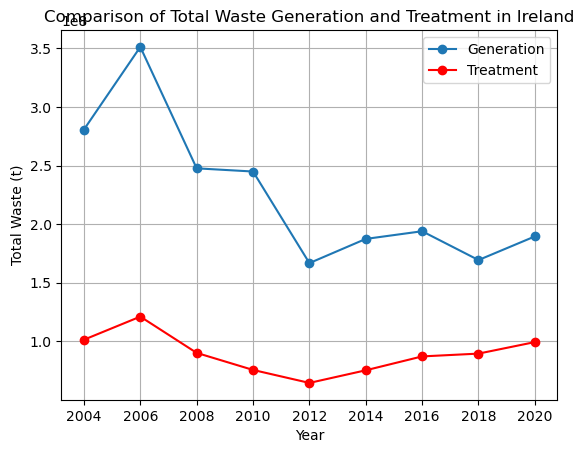

In [9]:
#trend of total waste generation over time
plt.plot(total_waste_gen_by_year.index, total_waste_gen_by_year.values, marker='o', linestyle='-', label='Generation')
plt.plot(total_waste_treat_by_year.index, total_waste_treat_by_year.values, marker='o', linestyle='-', color='red', label='Treatment')
plt.title('Comparison of Total Waste Generation and Treatment in Ireland')
plt.xlabel('Year')
plt.ylabel('Total Waste (t)')
plt.legend()
plt.grid(True)

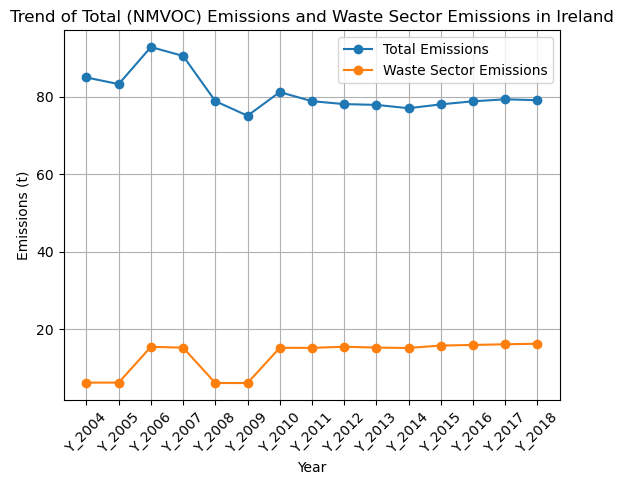

In [10]:
#trend of total emissions and waste emissions over time
plt.plot(total_emissions_by_year.index, total_emissions_by_year.values, marker='o', linestyle='-', label='Total Emissions')
plt.plot(waste_emissions_by_year.index, waste_emissions_by_year.values, marker='o', linestyle='-', label='Waste Sector Emissions')
plt.title('Trend of Total (NMVOC) Emissions and Waste Sector Emissions in Ireland')
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.legend()
plt.grid(True)
plt.xticks(total_emissions_by_year.index)
plt.tick_params(axis='x', rotation=45)

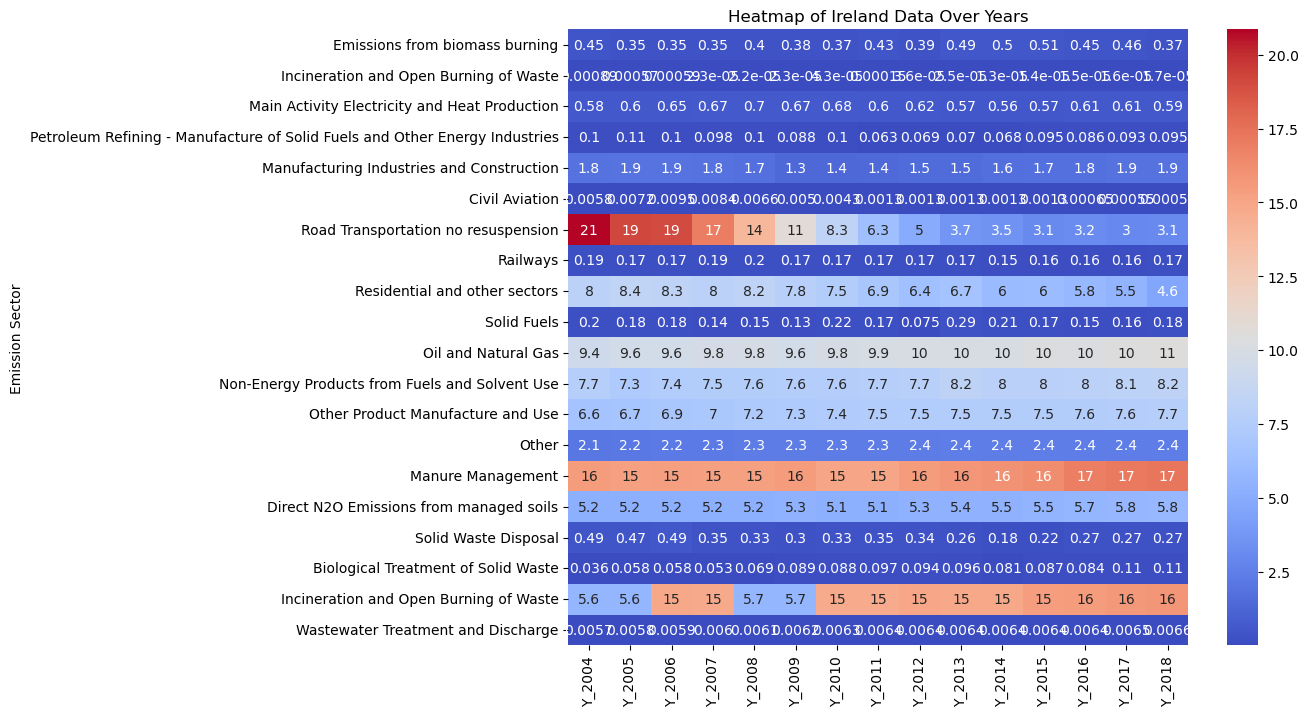

In [11]:
# Set 'Emission Sector' as the index
df = df_emissions
df.set_index('Emission Sector', inplace=True)

# Creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm')
plt.title('Heatmap of Ireland Data Over Years')
plt.show()